# **Першопочаткове налаштування**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

if tf.config.list_physical_devices('GPU'):
  print("TensorFlow IS using the GPU")
else:
  print("TensorFlow IS NOT using the GPU")

TensorFlow IS using the GPU


Налаштування було успішним, у ході експериментів використовуватиметься GPU.

Перейдемо до реалізації практичного завдання лабораторної роботи, завантаживши класичний датасет для задачі класифікації зображень Fashion MNIST, що складається з зображень розміром 28*28 пікселів у сірому діапазоні кольорів.

Так як цей датасет вбудований в Keras, завантажимо його одразу:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Завантажені зображення є, по суті, масивами пікселів, значення кожного з пікселів варіюється від 0 до 255, включно, а значення кожного з лейблів у масивах лейблів варіюються від 0 до 9 включно, ці значення є фактичними класами, до яких нейромережа приписуватиме зображення.

Так як ми хочемо отримати відносно точні результати у наслідку тренування нейромережі, одразу нормалізуємо формат даних таким чином, аби кожне значення використовуваних нейромережею масивів відповідало діапазону [0; 1].

Зробити це можна, поділивши значення масивів пікселів на 255, адже це є найбільшим значенням у масивах:

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Побудова нейромережі**

Побудуємо архітектуру простої секвентальної нейромережі (Sequential API):

In [5]:
model = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Дана модель матиме три слої:

1.  Вхідний слой Flatten, за рахунок пре-процесингу якого двомірні матриці пікселів перегортаються в одномірні масиви чисел, з якими зможе працювати нейромережа;
2.  Прихований слой Dense, який є основним обчислювальним слоєм з 128 нейронами, активаційна функція relu використовується через свою поширеність у простих задачах класифікації зображень;
3.  Вихідний слой Dense, має 10 нейронів для кожного з класів зображень ([0; 9]), активаційна функція softmax використовується для автоматичної конвертації вихідних даних у відсоткові значення для кожного з 10 класів.



# **Компіляція моделі**

Проведемо компіляцію моделі та виведемо її архітектуру:

In [6]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

У кожної мережі є три основні компіляційні параметри: функція оптимізації (optimizer), функція втрати (loss) і параметр виведення (metrics). Розглянемо вибір кожного з них:



*   Optimizer: було обрано Adam, адже ця функція є найбільш поширеною для задач класифікації;
*   Loss: було обрано Sparse Categorical Crossentropy, адже ця функція є найбільш поширеною для задач класифікації;
*   Metrics: було обрано accuracy, адже по ходу тестування ми бажаємо бачити саме точність моделі нейромережі.



Виведемо підсумки зкомпільованої моделі нейромережі:

In [7]:
model.summary()

Model: "TDP1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Як можемо побачити, у створеній моделі:


1.   На першому слої: 784 (28*28) вхідних параметри, і 0 вихідних, адже слой є виключно вхідним;
2.   На другому слої: 128 вхідних параметрів (за кількістю нейронів), і 100480 (784 * 128 + 128 зміщень за замовчуванням) вихідних параметрів;
3. На третьому слої: 10 вхідних параметрів (за кількістю нейронів), і 1290 (128 * 10 + 10 зміщень за замовчуванням) вихідних параметрів;



# **Тренування моделі**

Виконаємо першопочаткове тренування моделі з 10 епохами, і виділенням 20% тренувальних даних (12000 з 60000) на валідацію, аби розміри даних для валідації (12000) та тестування (10000) були приблизно однаковими:

In [8]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7732 - loss: 0.6581 - val_accuracy: 0.8439 - val_loss: 0.4360
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8585 - loss: 0.3932 - val_accuracy: 0.8704 - val_loss: 0.3577
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8739 - loss: 0.3450 - val_accuracy: 0.8733 - val_loss: 0.3509
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8834 - loss: 0.3216 - val_accuracy: 0.8745 - val_loss: 0.3466
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8894 - loss: 0.2987 - val_accuracy: 0.8727 - val_loss: 0.3479
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8988 - loss: 0.2811 - val_accuracy: 0.8815 - val_loss: 0.3304
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9005 - loss: 0.2648 - val_accuracy: 0.8752 - val_loss: 0.3378
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9020 - loss: 0.2606 - val_accurac

Тепер, виконаємо аналіз точності моделі на тестових даних:

In [9]:
print("--- Перевіряємо точність моделі на тестових даних ---")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Тестова точність:", test_accuracy)
print("Тестова помилка:", test_loss)

--- Перевіряємо точність моделі на тестових даних ---
313/313 - 2s - 5ms/step - accuracy: 0.8757 - loss: 0.3457
Тестова точність: 0.8756999969482422
Тестова помилка: 0.34565427899360657


Виведемо на графіку результати тестувань, що покажуть ефективність моделі:

In [10]:
def display_results(history, model=None, title=None):
  name = (
        title
        or (getattr(model, 'name', None))
        or (getattr(getattr(history, 'model', None), 'name', None))
        or 'Модель'
      )

  history_dictionary = history.history
  accuracy = history_dictionary['accuracy']
  val_accuracy = history_dictionary['val_accuracy']
  loss = history_dictionary['loss']
  val_loss = history_dictionary['val_loss']
  epochs_range = range(1, len(accuracy) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  fig.suptitle(f'Модель: {name}', fontsize=14, y=1.03)

  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, accuracy, 'o-', color='#1f77b4', label='Точність тренування')
  plt.plot(epochs_range, val_accuracy, '-', color='#ff7f0e', label='Точність валідації')
  plt.title('Точність тренування і валідації')
  plt.xlabel('Епохи')
  plt.ylabel('Точність')
  plt.ylim(0.5, 1.0)
  plt.legend()
  plt.grid(alpha=0.2)

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, 'o-', color='#1f77b4', label='Помилка тренування')
  plt.plot(epochs_range, val_loss, '-', color='#ff7f0e', label='Помилка валідації')
  plt.title('Помилка тренування і валідації')
  plt.xlabel('Епохи')
  plt.ylabel('Помилка')
  plt.ylim(0.0, 0.5)
  plt.legend()
  plt.grid(alpha=0.2)

  fig.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()


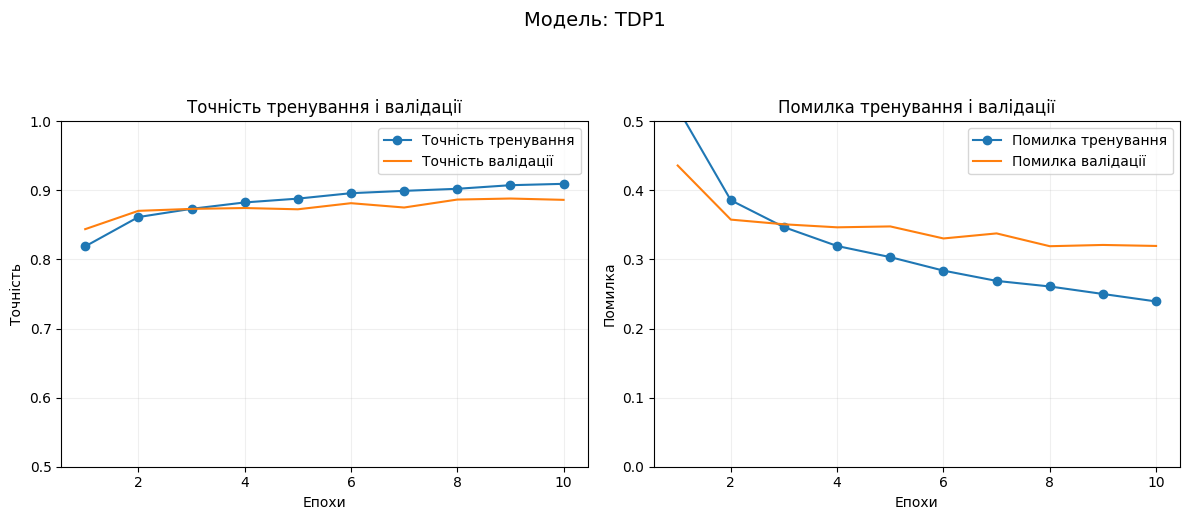

In [11]:
display_results(history)

Як можемо побачити, приблизно після 4 епох зменшується точність валідації даних, непропорційно тренувальним даним.

Спробуємо різні оптимізації, аби побачити їхній ефект на точності моделі, але спочатку збережемо першопочаткову модель:

In [12]:
model.save('tdp1_model_v1.keras')
print('\nЗбережено модель tdp1_model_v1')


Збережено модель tdp1_model_v1


# **Підбір гіперпараметрів шляхом зміни архітектури моделі**

Спочатку, аби запобігти перенавчання у будь-якому майбутньому сценаріЇ, застосуємо метод ранньої зупинки зі значенням толерантності 10:

In [13]:
early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=1e-3,
    restore_best_weights=True,
    mode='min'
)

Застосуємо також поступове зниження швидкості навчання:

In [14]:
lr_reduction_callback = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    cooldown=2,
    min_delta=1e-3,
    min_lr=1e-6,
    verbose=1,
    mode='min'
)

Протестуємо раніше створену модель з новими гіперпараметрами, але спочатку визначимо загальні методи:

In [15]:
def get_optimizer(lr=1e-3):
  return keras.optimizers.Adam(learning_rate=lr)

def compile_and_fit(model, name=None, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()

  model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    )

  model.summary()

  history = model.fit(
      train_images,
      train_labels,
      epochs=max_epochs,
      validation_split=0.2,
      callbacks=[early_stopping_callback, lr_reduction_callback],
      verbose=1
      )
  return history

Застосуємо новостворені оптимізації на раніше збереженій моделі та виведемо результати:

Model: "TDP1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9128 - loss: 0.2319 - val_accuracy: 0.8853 - val_loss: 0.3317 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9148 - loss: 0.2218 - val_accuracy: 0.8904 - val_loss: 0.3183 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9186 - loss: 0.2151 - val_accuracy: 0.8920 - val_loss: 0.3265 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9232 - loss: 0.2059 - val_accuracy: 0.8939 - val_loss: 0.3094 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9277 - loss: 0.1976 - val_accuracy: 0.8880 - val_loss: 0.3231 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9251 - loss: 0.1960 - val_accuracy: 0.8942 - val_loss: 0.3168 - learning_rate: 0.0010
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

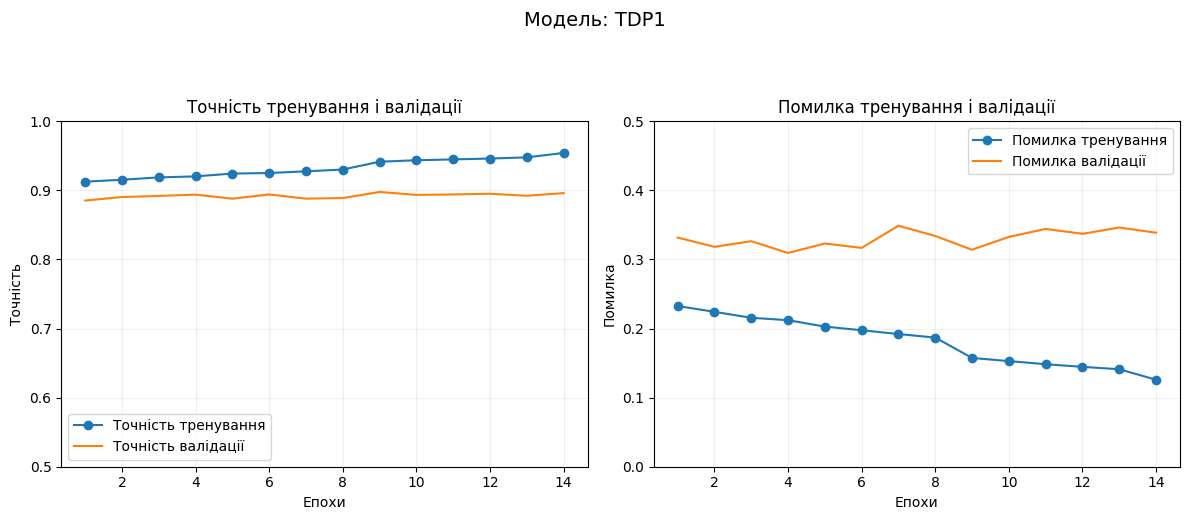

In [16]:
initial_model = keras.models.load_model('tdp1_model_v1.keras')

history = compile_and_fit(initial_model)
display_results(history)

Як можемо побачити, хоча запровадження зменшення швидкості навчання збільшило кількість епох з 10 до приблизно 25, результативні точність та помилка на тестових та валідаційних даних кращі.

Спробуємо тепер різні за розміром архітектури (кількість шарів та нейронів) з новоствореними пасивними оптимізаціями, аби визначити найбільш оптимальний розмір моделі. Визначимо початкові архітектури:

In [17]:
model_tiny = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_tiny'
)

model_small = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_small'
)

model_medium = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium'
)

model_large = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_large'
)

Проведемо компіляцію та тренування цих моделей:

In [18]:
size_histories = {}
size_histories['initial'] = history
size_histories['tiny'] = compile_and_fit(model_tiny)
size_histories['small'] = compile_and_fit(model_small)
size_histories['medium'] = compile_and_fit(model_medium)
size_histories['large'] = compile_and_fit(model_large)

Model: "TDP1_tiny"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7458 - loss: 0.7410 - val_accuracy: 0.8468 - val_loss: 0.4351 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8521 - loss: 0.4207 - val_accuracy: 0.8638 - val_loss: 0.3982 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8590 - loss: 0.3945 - val_accuracy: 0.8588 - val_loss: 0.3957 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8705 - loss: 0.3656 - val_accuracy: 0.8637 - val_loss: 0.3821 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.3374 - val_accuracy: 0.8699 - val_loss: 0.3630 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8788 - loss: 0.3355 - val_accuracy: 0.8657 - val_loss: 0.3754 - learning_rate: 0.0010
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

Model: "TDP1_small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7543 - loss: 0.7169 - val_accuracy: 0.8486 - val_loss: 0.4327 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8484 - loss: 0.4244 - val_accuracy: 0.8468 - val_loss: 0.4317 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8680 - loss: 0.3676 - val_accuracy: 0.8665 - val_loss: 0.3742 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8733 - loss: 0.3430 - val_accuracy: 0.8772 - val_loss: 0.3465 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8871 - loss: 0.3102 - val_accuracy: 0.8717 - val_loss: 0.3566 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8901 - loss: 0.3008 - val_accuracy: 0.8791 - val_loss: 0.3316 - learning_rate: 0.0010
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step -

Model: "TDP1_medium"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7588 - loss: 0.6815 - val_accuracy: 0.8528 - val_loss: 0.4083 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8570 - loss: 0.3932 - val_accuracy: 0.8579 - val_loss: 0.3879 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8715 - loss: 0.3496 - val_accuracy: 0.8739 - val_loss: 0.3525 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8788 - loss: 0.3218 - val_accuracy: 0.8729 - val_loss: 0.3613 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8919 - loss: 0.2915 - val_accuracy: 0.8736 - val_loss: 0.3436 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8950 - loss: 0.2819 - val_accuracy: 0.8756 - val_loss: 0.3676 - learning_rate: 0.0010
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

Model: "TDP1_large"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7603 - loss: 0.6659 - val_accuracy: 0.8562 - val_loss: 0.4004 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8602 - loss: 0.3859 - val_accuracy: 0.8687 - val_loss: 0.3637 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8729 - loss: 0.3425 - val_accuracy: 0.8766 - val_loss: 0.3480 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8829 - loss: 0.3190 - val_accuracy: 0.8748 - val_loss: 0.3418 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8915 - loss: 0.2907 - val_accuracy: 0.8823 - val_loss: 0.3288 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8971 - loss: 0.2753 - val_accuracy: 0.8712 - val_loss: 0.3607 - learning_rate: 0.0010
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

Виведемо результати на 4 графіки для кожної з моделей:

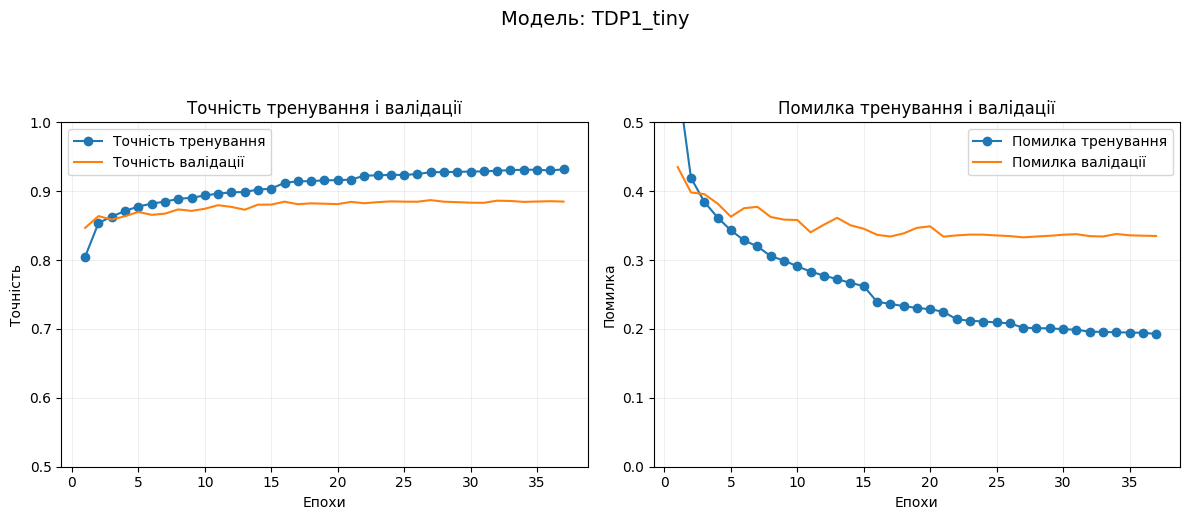

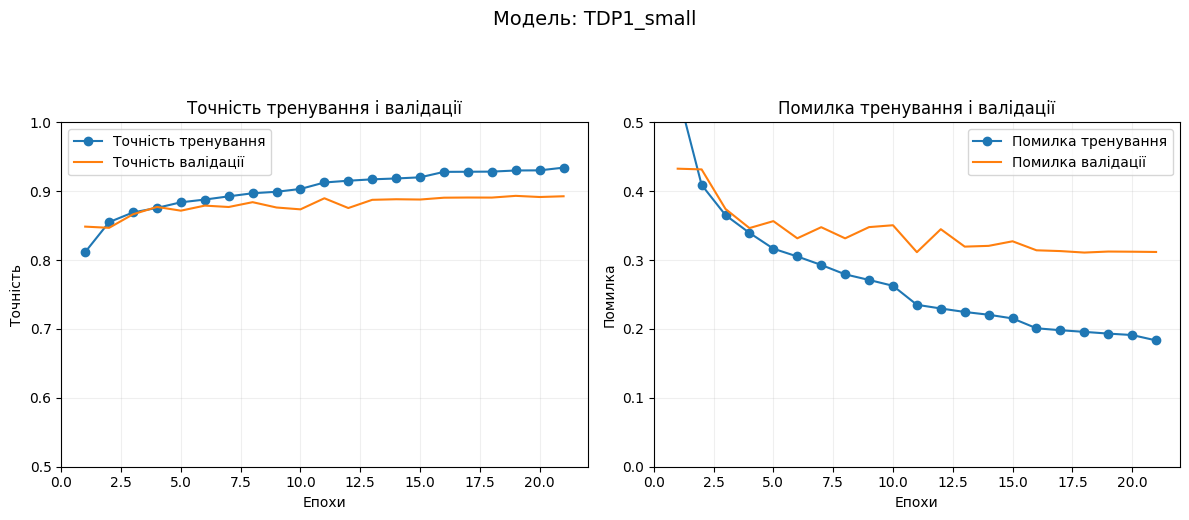

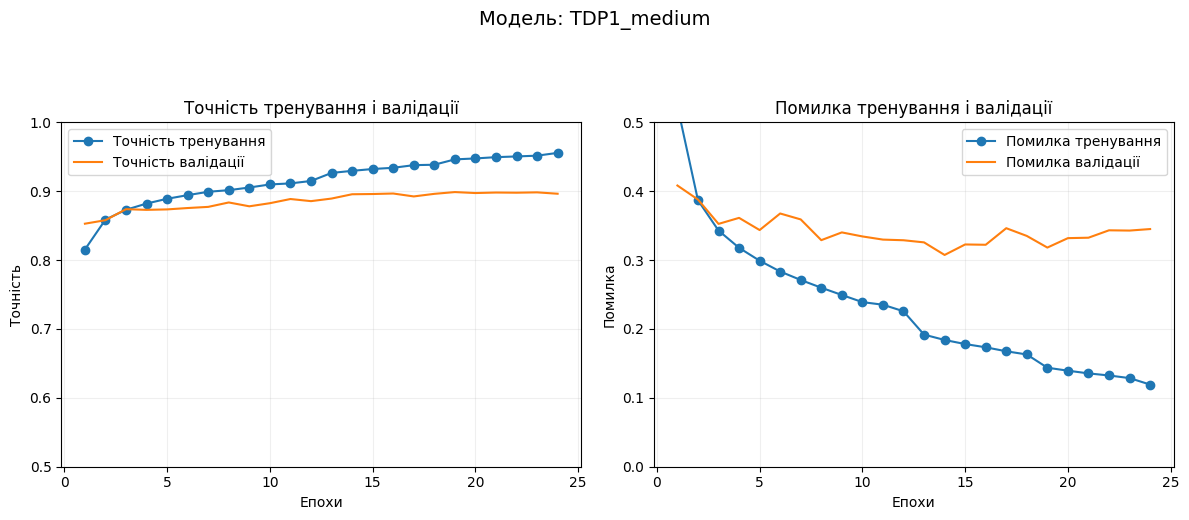

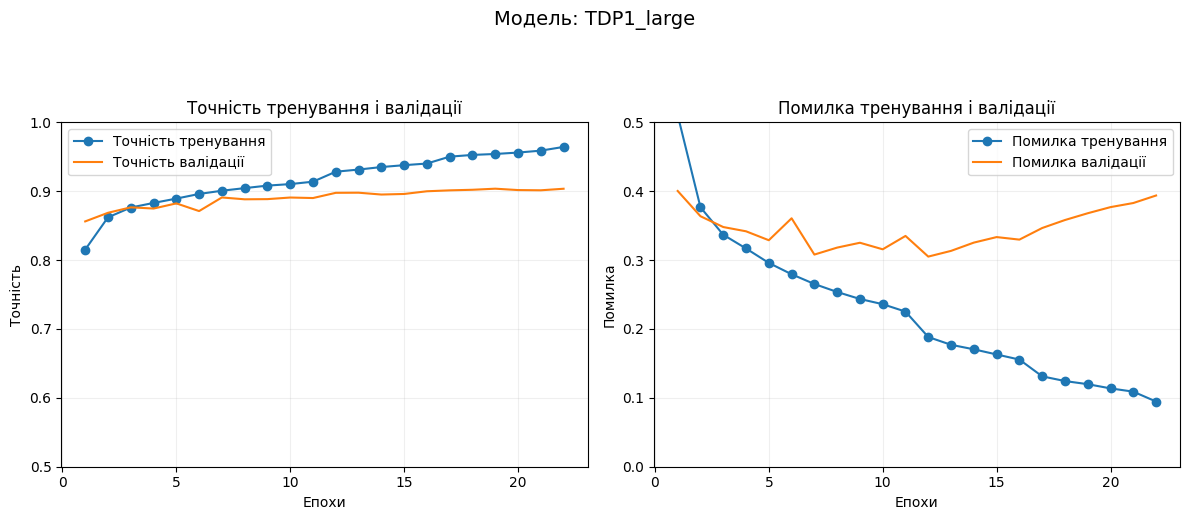

In [19]:
display_results(size_histories['tiny'])
display_results(size_histories['small'])
display_results(size_histories['medium'])
display_results(size_histories['large'])

Додатково, порівняємо на графіку результати помилки валідації всіх моделей, аби визначити найбільш підходящу для подальшої оптимізації архітектуру:

In [29]:
def display_all_results(histories):
  plt.figure(figsize=(10, 6))
  for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=name)

  plt.xlabel("Епохи")
  plt.ylabel("Помилка валідації")
  plt.title("Порівняння помилки валідації моделей")
  plt.legend()
  plt.grid(alpha=0.2)
  plt.xlim([0, 30])
  plt.ylim([0.3, 0.45])
  plt.show()

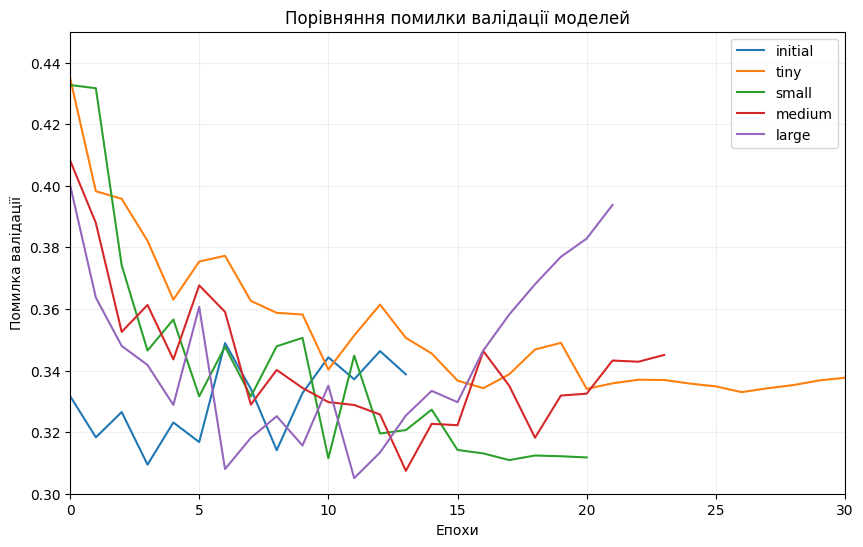

In [30]:
display_all_results(size_histories)

Як можемо побачити, першопочаткова модель є занадто нестабільною через один прихований слой. Розглянемо інші моделі:


*   Крихітна модель - відбувається недонавчання, висока помилка на всіх епохах;
*   Мала модель - хороша помилка, однак ближче до 10 епох починаться перенавчання;
*   Середня модель - найнижча помилка протягом декількох епох, найбільш незначне перенавчання;
*   Велика модель - очевидне перенавчання;

Роблячи висновок із зображених на графіку результатів, найбільш підходящою моделлю для подальшого використання та оптимізації є середня модель. Мала модель є другим найкращим претендентом, і може буде використаною у ситуаціях де більш швидка модель є приорітетом точній моделі, але середня модель, в даному випадку, буде найбільш збалансованою, тож використаємо її.





Збережемо середню модель для подальших експериментів:

In [31]:
model.save('tdp1_model_v2.keras')
print('\nЗбережено модель tdp1_model_v2')


Збережено модель tdp1_model_v2


# **Ліквідація перенавчання**

Спробуємо застосувати подальші оптимізації, такі як L1/L2 регуляризації та Dropout, аби забезпечити ліквідацію перенавчання і подальше збільшення точності результатів.

Створимо дві моделі, що базуються на щойно збереженій середній моделі, кожна з яких застосуватиме різні види регуляризації зі значенням параметра в 0.001 - L1, L2 та L1 + L2:

In [32]:
model_medium_l1 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1(0.001)),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1'
)

model_medium_l2 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l2'
)

model_medium_l1l2 = keras.Sequential(
    [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    keras.layers.Dense(10, activation='softmax')
    ],
    name='TDP1_medium_l1l2'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Виконаємо компіляцію та тестування нових моделей для порівняння результатів з оригіналом:

In [ ]:
initial_model = keras.models.load_model('tdp1_model_v2.keras')

optimization_histories = {}
optimization_histories['initial'] = size_histories['medium']
optimization_histories['l1'] = compile_and_fit(model_medium_l1)
optimization_histories['l2'] = compile_and_fit(model_medium_l2)
optimization_histories['l1l2'] = compile_and_fit(model_medium_l1l2)

Model: "TDP1_medium_l1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7371 - loss: 2.2869 - val_accuracy: 0.8097 - val_loss: 0.9118 - learning_rate: 0.0010
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8046 - loss: 0.8891 - val_accuracy: 0.8248 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8185 - loss: 0.7496 - val_accuracy: 0.8207 - val_loss: 0.7222 - learning_rate: 0.0010
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8277 - loss: 0.7018 - val_accuracy: 0.8322 - val_loss: 0.6670 - learning_rate: 0.0010
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8373 - loss: 0.6586 - val_accuracy: 0.8300 - val_loss: 0.6837 - learning_rate: 0.0010
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8401 - loss: 0.6397 - val_accuracy: 0.8388 - val_loss: 0.6418 - learning_rate: 0.0010
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step -

Виведемо на 3 графіках результати для кожної з нових моделей:

In [ ]:
display_results(optimization_histories['l1'])
display_results(optimization_histories['l2'])
display_results(optimization_histories['l1l2'])

Виведемо результати помилки валідаційних даних для всіх моделей:

In [ ]:
display_all_results(optimization_histories)